In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

import torch
import pickle

from env import *
from policy.qroute import Qroute

In [2]:
def train(para, **kw):
    result = {}
    for l in para['range']:
        l = round(l,2)
        # nw.clean()
        nw.route_time = 0
        nw.all_packets = nw.all_packets - nw.end_packets
        nw.end_packets = 0
        result[l] = nw.train(para['times'],lambd = l, lr=para['lr'], freq = para['freq'], **kw)
    return result

In [3]:
# nw = Network('GEANT2.net', is_drop=False)
nw = Network('net/ATT.net', is_drop=False)

In [4]:
nw.agent = Qroute(nw, epsilon=0, static = False)

In [6]:
QR = {}
DR = {}
# nw.agent.load('GEANT2/qr/4.4')
# nw.agent.load('6x6/qr/3.0')
nw.agent.load('AT&T/qr/3.0')

In [10]:
for h in range(1):  
#     DQL = {}
    for i in tqdm(np.arange(2.6, 3.21, 0.1)):
        for k,v in train({
            'range': [round(i, 2)],
            'times': 10000,
            'lr': {},
            'freq': 1
        }, droprate = True, hop = True).items():
            QR[i] = v['route_time']
            DR[ i] = v['droprate']
        print(round(i, 2), 'finished and average time is', v['route_time'][-1])
        # if v['route_time'][-1] < 15:
        #     nw.agent.store('%s/%s/%.1f'%('lata', 'qr', i))

100%|██████████| 7/7 [03:23<00:00, 29.08s/it]3.2 finished and average time is 1000.3144268987002



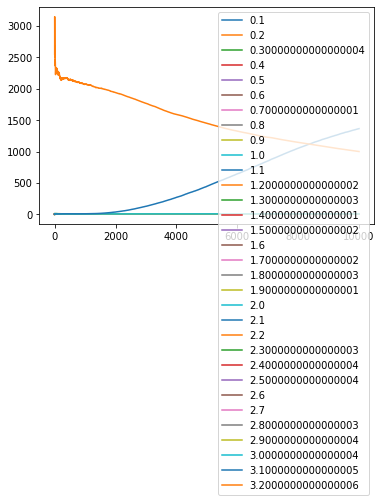

In [11]:
qr = pd.DataFrame(QR)
qr.plot()

In [12]:
qr.tail().mean()

0.1       4.856415
0.2       9.288024
0.3       6.398637
0.4       4.480625
0.5       4.009221
0.6       3.822295
0.7       3.871046
0.8       3.786941
0.9       3.839248
1.0       3.905788
1.1       3.913878
1.2       3.998175
1.3       4.015874
1.4       4.132131
1.5       4.157986
1.6       4.271243
1.7       4.341880
1.8       4.526128
1.9       4.528411
2.0       4.674939
2.1       4.816656
2.2       5.089944
2.3       5.148889
2.4       5.530190
2.5       5.509855
2.6       5.558284
2.7       5.701901
2.8       6.127191
2.9       6.796468
3.0       7.410884
3.1    1364.773328
3.2    1000.436535
dtype: float64

In [11]:
# qr.to_csv('df2/qr_dynamic_routing_range_1.csv')

In [ ]:
# nw.agent.store('GEANT2/qr1/4.5')
nw.agent.store('lata/qr/2.4_hah')

In [32]:
# print6x6(nw)

# analyse what happen in a high load

In [9]:
np.set_printoptions(precision=4, threshold=36, edgeitems=36, linewidth=75, suppress=True, nanstr='nan', infstr='inf')

In [24]:
check_action = nw.agent.check_action
Q_table = nw.agent.Qtable
check_utilization = np.array(list(nw.agent.check_utilization.values()))

In [25]:
a_s = sum(check_utilization)
a_s

852113

In [26]:
utilize_percentage = (check_utilization/a_s * 100).reshape(6,6)
utilize_percentage

array([[1.29231686, 1.47222258, 1.12297313, 0.7962559 , 1.22871028,
        1.08401116],
       [2.46364039, 2.22857767, 1.9495067 , 1.67348697, 2.696356  ,
        3.37443508],
       [2.79610803, 2.41094784, 2.23503221, 1.14069378, 2.11016614,
        3.75865642],
       [4.10555877, 3.22163844, 4.03221169, 4.16940007, 3.77508617,
        4.64879658],
       [4.0511059 , 1.16709873, 0.78193855, 2.29805202, 2.34112142,
        4.09840009],
       [4.15778189, 4.25999838, 4.31621158, 4.31503803, 4.25178351,
        4.17468106]])

In [20]:
m = np.mean(utilize_percentage)
var = np.var(utilize_percentage)
var

1.5383960113549555

In [42]:
check_action[23]

array([[   0.,    0.,  869.],
       [   0.,    0.,   99.],
       [  91.,    0.,    0.],
       [   0.,  860.,    0.],
       [   0., 1170.,    0.],
       [   0., 2423.,    0.],
       [   0.,    0.,  432.],
       [ 108.,    0.,    0.],
       [1256.,    0.,    0.],
       [   0.,  928.,    0.],
       [   0., 2451.,    0.],
       [   0., 2441.,    0.],
       [   0.,    0.,  103.],
       [ 109.,    0.,    0.],
       [   0.,   88.,    0.],
       [   0., 1070.,    0.],
       [ 928.,    0.,    0.],
       [   0., 2406.,    0.],
       [   0.,    0., 1045.],
       [ 952.,    0.,    0.],
       [1180.,    0.,    0.],
       [   0.,  736.,    0.],
       [ 916.,    0.,    0.],
       [   0.,    0.,    0.],
       [   0.,    0., 1509.],
       [ 965.,    0.,    0.],
       [ 952.,    0.,    0.],
       [1055.,    0.,    0.],
       [1083.,    0.,    0.],
       [   0.,    0., 1545.],
       [   0.,    0., 1498.],
       [   0.,    0., 1479.],
       [   0.,    0., 1512.],
       [  

In [46]:
Q_table[23].round(2)

array([[-1.28601e+03, -1.29260e+03, -2.74700e+01],
       [-1.19501e+03, -1.20745e+03, -3.36600e+01],
       [-1.15000e+01, -1.25476e+03, -1.27728e+03],
       [-7.71480e+02, -7.36000e+00, -8.32690e+02],
       [-6.48390e+02, -8.83000e+00, -6.82500e+02],
       [-6.63270e+02, -6.31000e+00, -7.05940e+02],
       [-1.21001e+03, -1.25754e+03, -2.98700e+01],
       [-1.77500e+01, -1.25361e+03, -1.24634e+03],
       [-1.00400e+01, -1.18838e+03, -1.18203e+03],
       [-6.52710e+02, -1.03000e+01, -6.64040e+02],
       [-6.02790e+02, -8.15000e+00, -6.11340e+02],
       [-5.67950e+02, -4.45000e+00, -6.96050e+02],
       [-1.14365e+03, -1.21605e+03, -3.02100e+01],
       [-1.18200e+01, -1.12551e+03, -1.10574e+03],
       [-1.10685e+03, -2.15000e+01, -1.12959e+03],
       [-5.94260e+02, -8.51000e+00, -6.72730e+02],
       [-2.68000e+00, -5.60640e+02, -6.48470e+02],
       [-5.60030e+02, -1.00000e+00, -5.86800e+02],
       [-1.02364e+03, -1.03437e+03, -3.06400e+01],
       [-1.01700e+01, -1.10933e

In [15]:
def check_only_one_action(check_dict):
    res = np.zeros((36,36))
    for s, vs in check_dict.items():
        for d in range(len(nw.agent.links)):
            check = vs[d]
            l = len(check)
            check = sum(check == 0)
            if check != l-1 and check != l:
                # there are multiple ways
                res[s][d] = 1
    return res

In [16]:
res = check_only_one_action(check_action)
(res==0).all()

True